In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Cargar el archivo CSV (suponiendo que está en el directorio raíz de Colab)
heart_failure = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Mostrar las primeras filas para verificar que se cargó correctamente
print(heart_failure.head())

# Definimos las variables numéricas y binarias
NUMERIC_COLS = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
BINARY_COLS = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

# Dividimos las características (X) de la variable objetivo (y)
X = heart_failure.drop(columns='DEATH_EVENT')
y = heart_failure['DEATH_EVENT']

# Preprocesamiento: Normalización y codificación de variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), NUMERIC_COLS),
        ('cat', OneHotEncoder(), BINARY_COLS)])

# Aplicamos el preprocesador a los datos
X_preprocessed = preprocessor.fit_transform(X)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Verificación de las dimensiones de los datos preprocesados
print(f"Conjunto de entrenamiento: {X_train.shape}, Conjunto de prueba: {X_test.shape}")


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

**Exploración y Preprocesamiento de Datos**

                          count           mean           std      min  \
age                       299.0      60.833893     11.894809     40.0   
anaemia                   299.0       0.431438      0.496107      0.0   
creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
diabetes                  299.0       0.418060      0.494067      0.0   
ejection_fraction         299.0      38.083612     11.834841     14.0   
high_blood_pressure       299.0       0.351171      0.478136      0.0   
platelets                 299.0  263358.029264  97804.236869  25100.0   
serum_creatinine          299.0       1.393880      1.034510      0.5   
serum_sodium              299.0     136.625418      4.412477    113.0   
sex                       299.0       0.648829      0.478136      0.0   
smoking                   299.0       0.321070      0.467670      0.0   
time                      299.0     130.260870     77.614208      4.0   
DEATH_EVENT               299.0       0.321070     

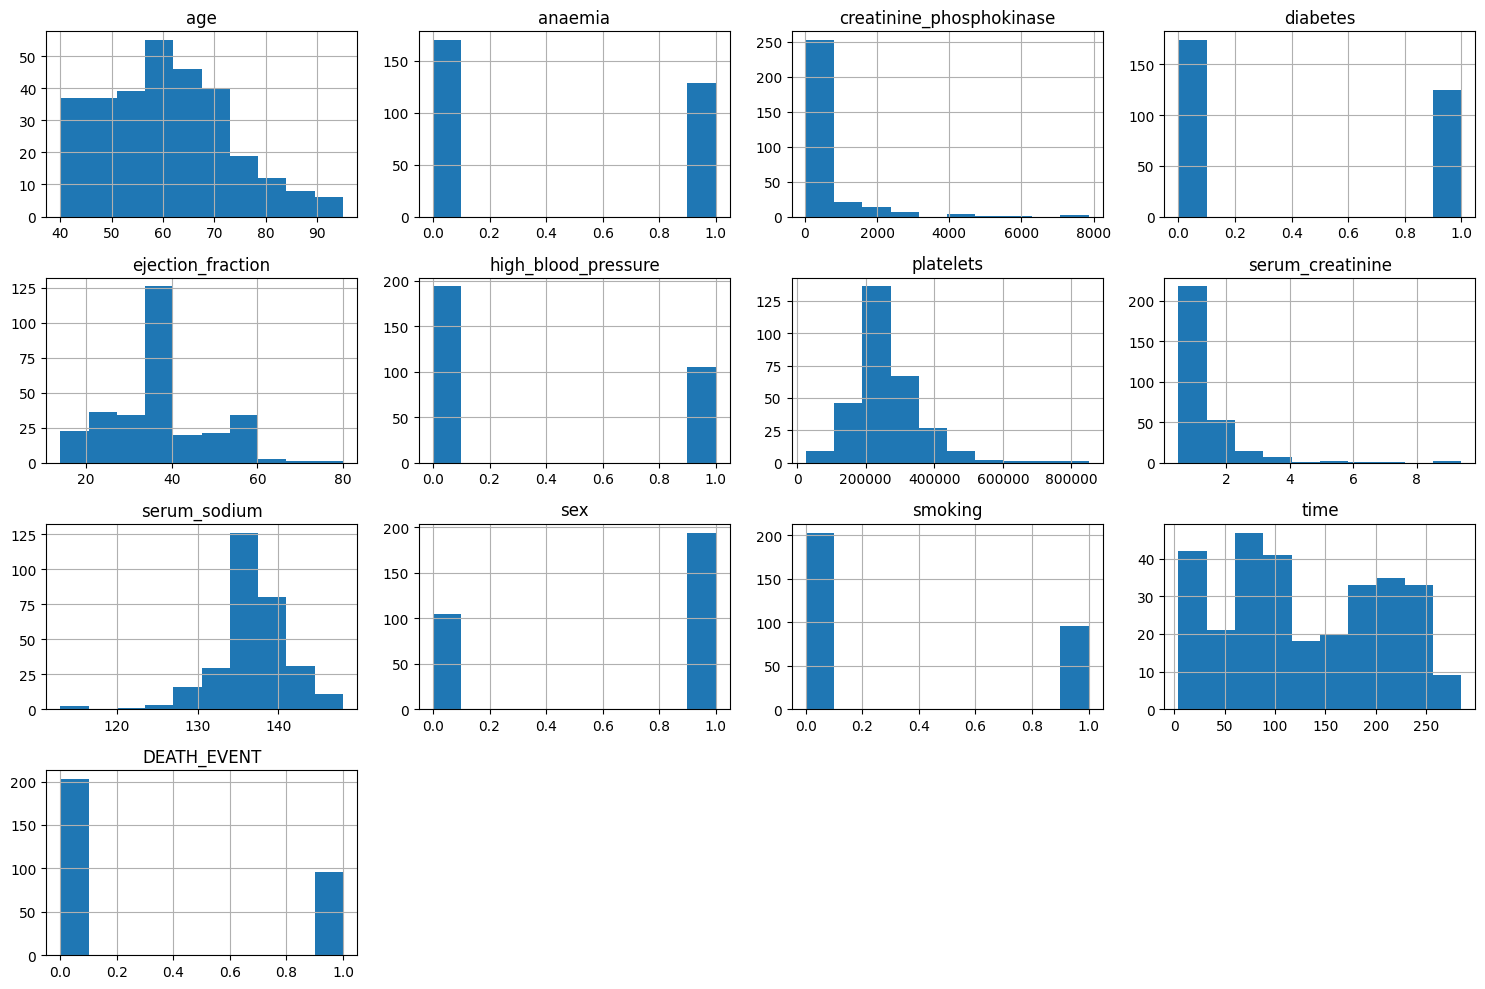

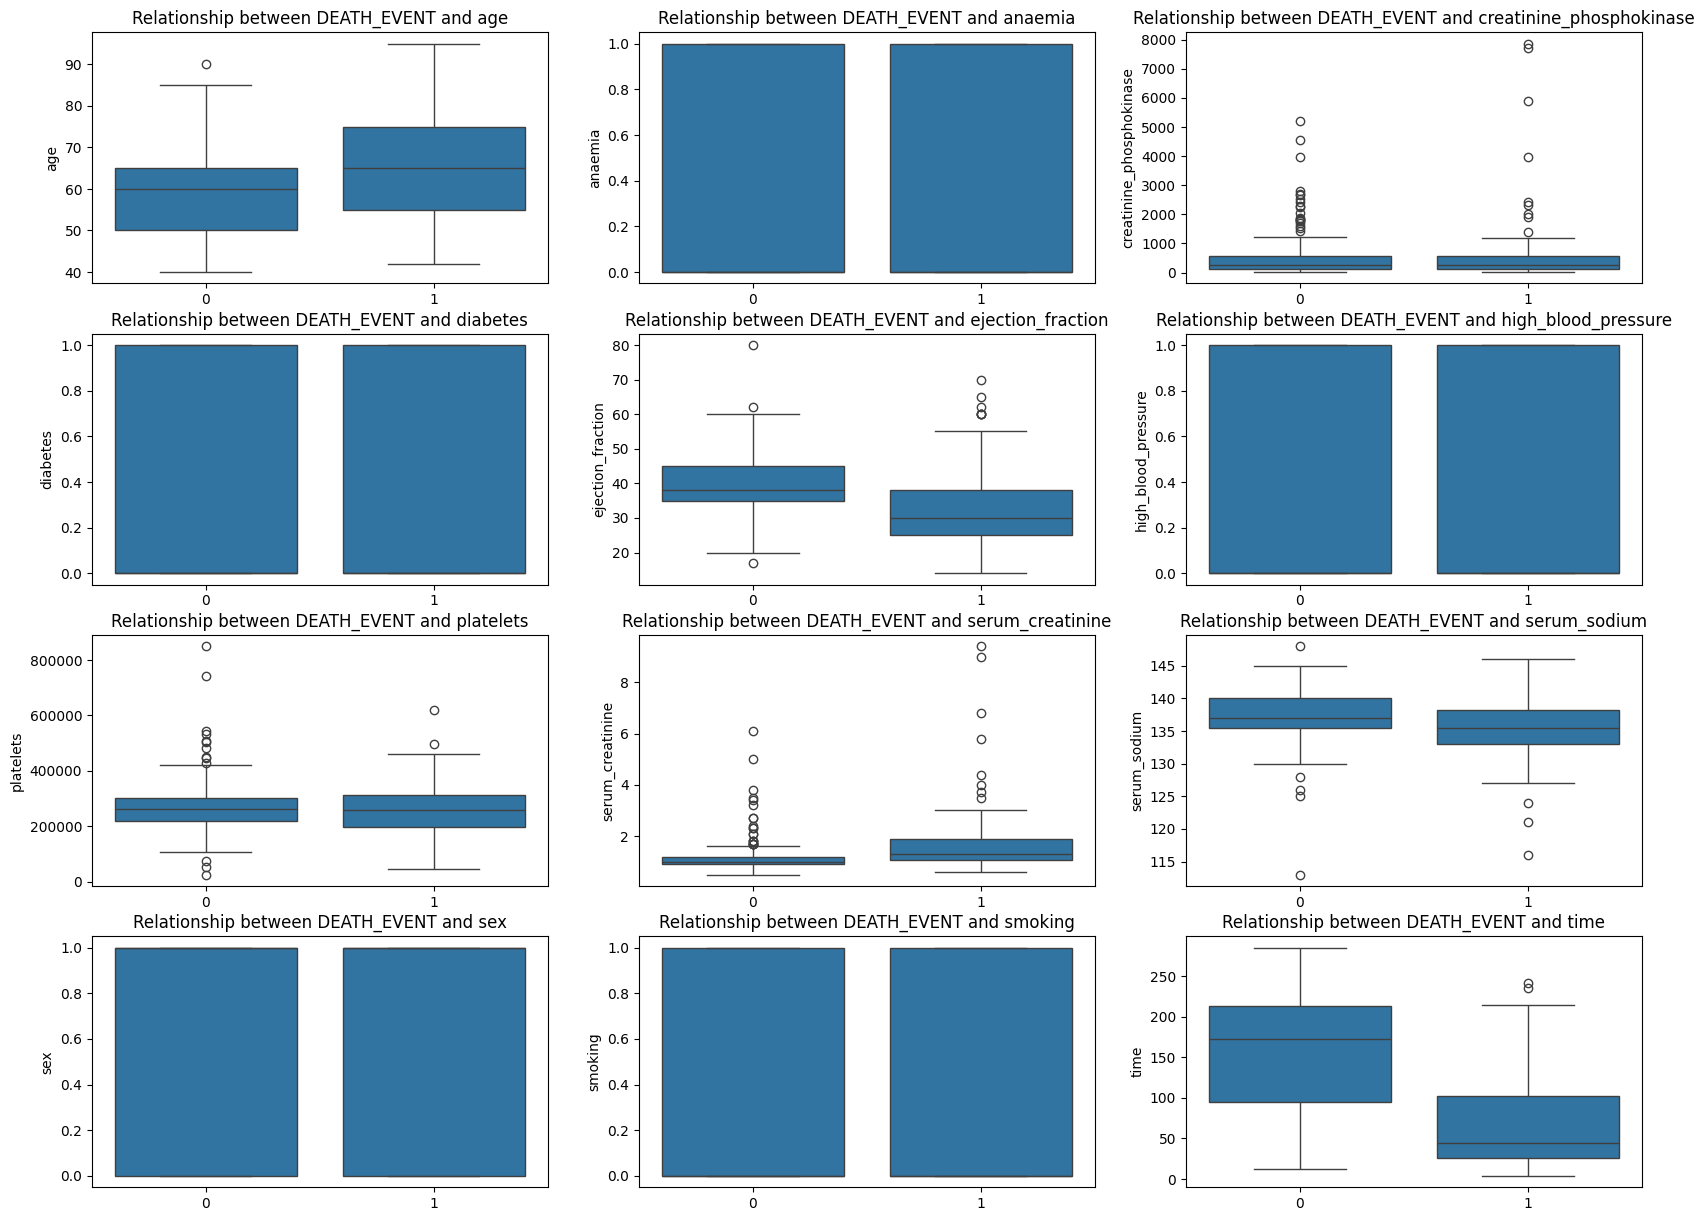

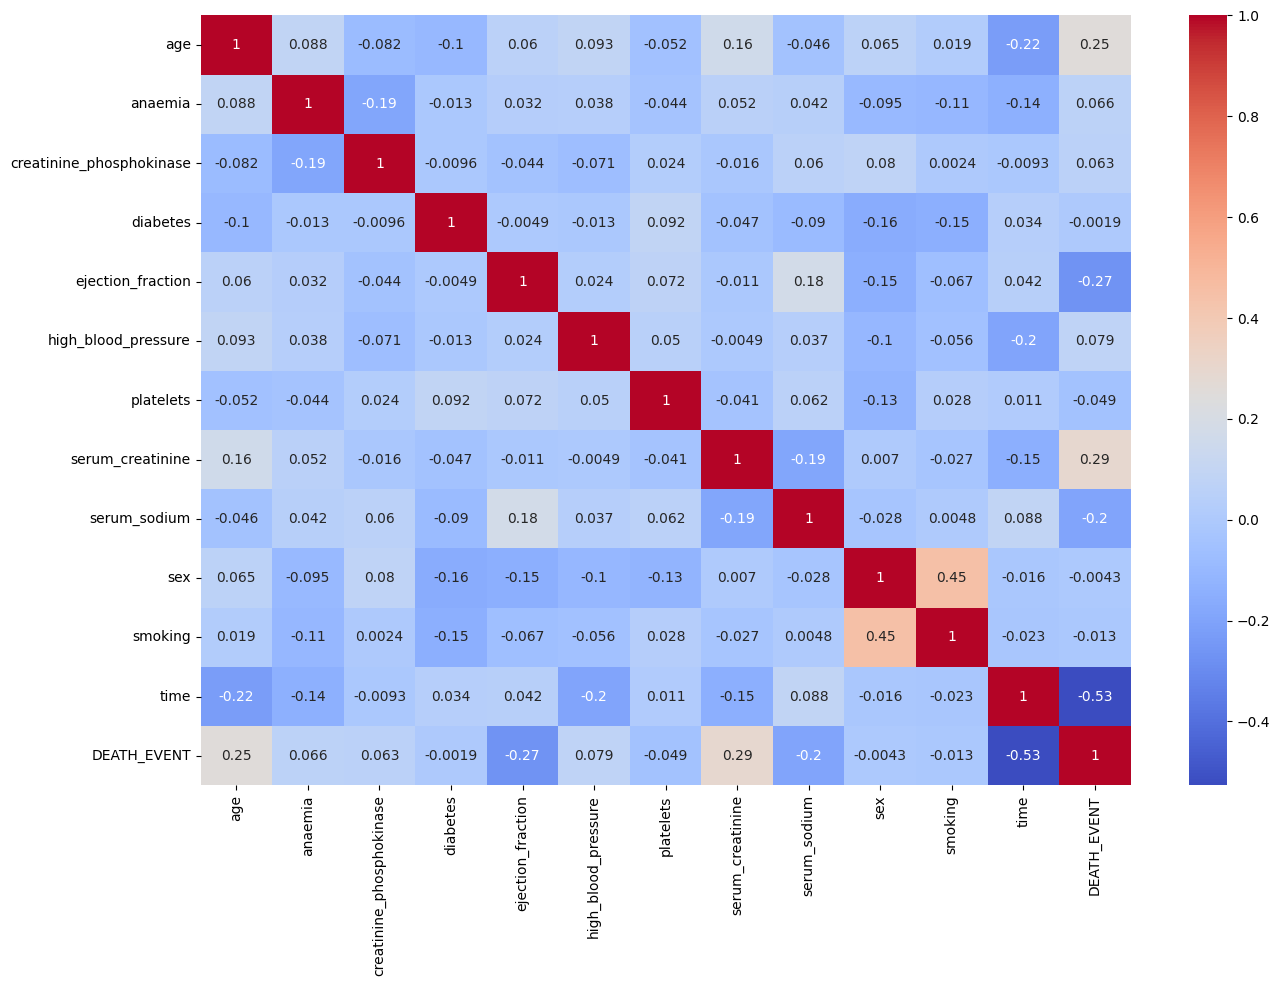

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Análisis exploratorio de datos (EDA)
print(heart_failure.describe().T)

# Visualizaciones: Histogramas de las variables numéricas
heart_failure.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Visualización: Relación entre DEATH_EVENT y otras variables
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.ravel()
for col, ax in zip(heart_failure.columns[:-1], axes):
    sns.boxplot(x='DEATH_EVENT', y=col, ax=ax, data=heart_failure)
    ax.set(title=f'Relationship between DEATH_EVENT and {col}', xlabel=None)
plt.show()

# Mapa de calor para mostrar las correlaciones entre las variables
plt.figure(figsize=(15, 10))
sns.heatmap(heart_failure.corr(), annot=True, cmap='coolwarm')
plt.show()


**Preprocesamiento de los Dato**

Definir variables numéricas y binarias

In [43]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Definir las variables numéricas y binarias
NUMERIC_COLS = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
BINARY_COLS = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']


Dividir las características (X) y la variable objetivo (y)



In [44]:
# Dividir las características (X) de la variable objetivo (y)
X = heart_failure.drop(columns='DEATH_EVENT')
y = heart_failure['DEATH_EVENT']


Normalización y Codificación de Variables Categóricas


In [45]:
# Preprocesamiento: Normalización y codificación de variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), NUMERIC_COLS),
        ('cat', OneHotEncoder(), BINARY_COLS)])

# Aplicamos el preprocesador a los datos
X_preprocessed = preprocessor.fit_transform(X)


División de Datos en Entrenamiento y Prueba


In [46]:
# Dividimos los datos en conjuntos de entrenamiento y prueba (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Verificación de las dimensiones de los datos preprocesados
print(f"Conjunto de entrenamiento: {X_train.shape}, Conjunto de prueba: {X_test.shape}")


Conjunto de entrenamiento: (239, 17), Conjunto de prueba: (60, 17)


**Parte 3 -Construcción del Modelo Random Forest**

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo Random Forest
model = RandomForestClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)


Evaluación Modelo

Precisión del modelo: 73.33%
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        35
           1       0.80      0.48      0.60        25

    accuracy                           0.73        60
   macro avg       0.76      0.70      0.70        60
weighted avg       0.75      0.73      0.72        60



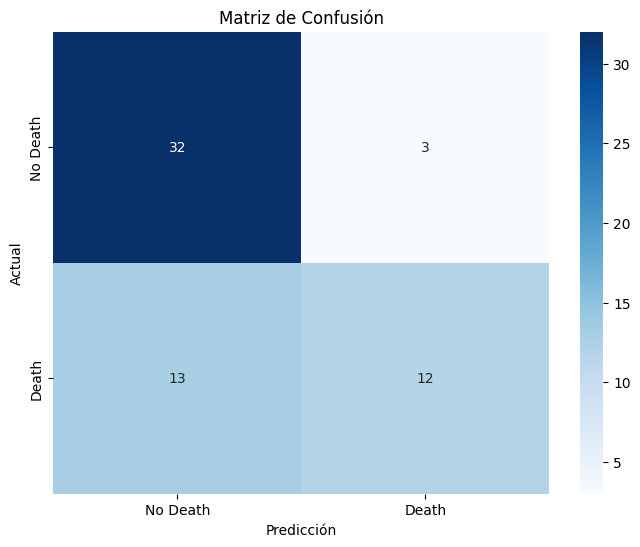

In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

# Generar un informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Death', 'Death'], yticklabels=['No Death', 'Death'])
plt.title("Matriz de Confusión")
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.show()


In [49]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros que queremos ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Usar GridSearchCV para encontrar la mejor combinación de parámetros
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print(f"Mejores parámetros: {grid_search.best_params_}")

# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Calcular la precisión del mejor modelo
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Precisión del mejor modelo: {accuracy_best * 100:.2f}%")


Mejores parámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Precisión del mejor modelo: 75.00%


Importancia de las categorías

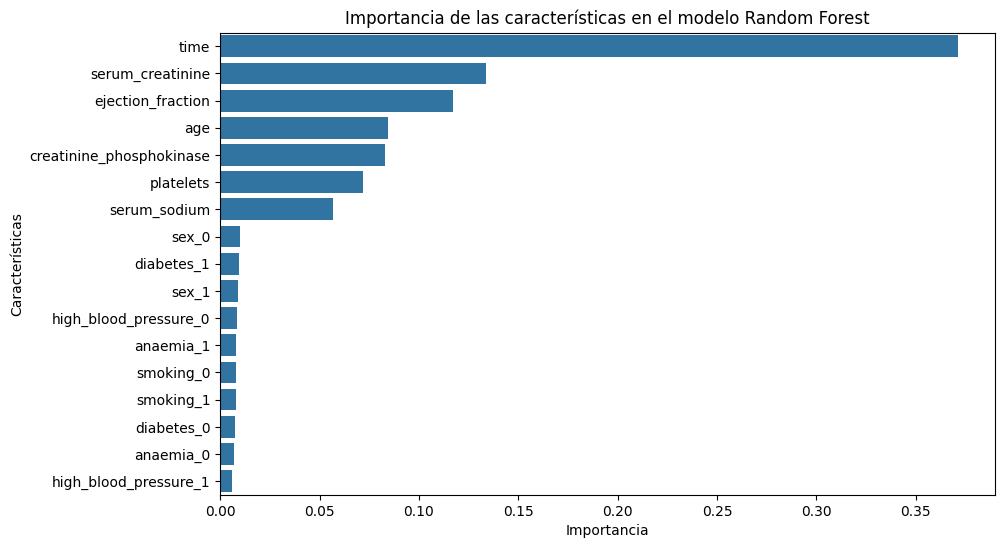

In [51]:
# Obtener las características numéricas y las categorías codificadas
encoded_categories = preprocessor.named_transformers_['cat'].get_feature_names_out(BINARY_COLS)
all_features = list(NUMERIC_COLS) + list(encoded_categories)

# Crear un DataFrame con las importancias de las características
feature_importance_df = pd.DataFrame({
    'Características': all_features,
    'Importancia': feature_importances
})

# Ordenar de mayor a menor importancia
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Visualizar la importancia de las características
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Características', data=feature_importance_df)
plt.title("Importancia de las características en el modelo Random Forest")
plt.show()


**Aplicación de Mejores Prácticas en el Pipeline de Modelado**

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el preprocesador para normalizar y codificar las características
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), NUMERIC_COLS),
        ('cat', OneHotEncoder(), BINARY_COLS)
    ]
)

# Ajustar el preprocesador al conjunto de entrenamiento
preprocessor.fit(X_train)

# Obtener los nombres de las columnas después del preprocesamiento
encoded_categories = preprocessor.named_transformers_['cat'].get_feature_names_out(BINARY_COLS)
all_features = list(NUMERIC_COLS) + list(encoded_categories)

# Aplicar el preprocesador a los datos de entrenamiento
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Convertir los datos preprocesados en DataFrames con los nombres de las columnas correctas
X_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns=all_features)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=all_features)

# Crear el modelo Random Forest
model = RandomForestClassifier(random_state=42)

# Entrenar el modelo con los datos preprocesados
model.fit(X_train_preprocessed, y_train)

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test_preprocessed)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 73.33%
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        35
           1       0.80      0.48      0.60        25

    accuracy                           0.73        60
   macro avg       0.76      0.70      0.70        60
weighted avg       0.75      0.73      0.72        60

